Deep Neural Networks Using Pytorch

In [0]:
import torch
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn

Step1: Generate a dataset of 500 points

In [0]:
n_pts=500
X,y=datasets.make_circles(n_samples=n_pts,random_state=13,noise=0.1,factor=0.2)   
X_data=torch.Tensor(X)    # convert to tensors
y_data=torch.Tensor(y.reshape(500,1))

The Dataset generated here has two concentrated circles with a one of size 20 percent larger that the other. (factor=0.2). Noise parameter makes sure that our data is not too complex but still difficult to classify.

In [0]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

The points in class blue are labeled to 0 and that of class green as 1

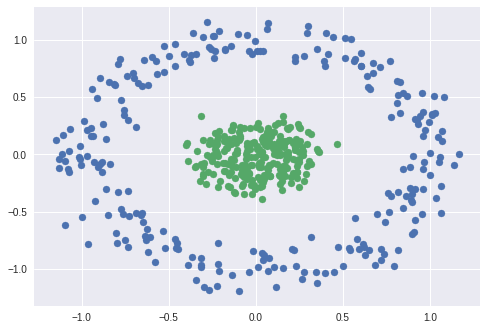

In [38]:
scatter_plot()

Step2: Define the Model

We cannot linearlyclassify the above dataset. Thus we will need a hidden layer.

In [0]:
class Model(nn.Module):
  def __init__(self,input_size,H1,output_size):   # Defines the constructor of the model
    super().__init__()                         # Inherits the super class i.e nn.Module
    self.linear=nn.Linear(input_size,H1)     # Performs Linear transformation with input features as input size and output feature as hidden layer 
    self.linear2=nn.Linear(H1,output_size) # Performs Linear transformation with input features as hidden layer and output feature as output size
 
  def forward(self,x):                      # Detemine the predicted y value usinf sigmoid activation function
    x=torch.sigmoid(self.linear(x))  # here the sigmoid function is applied to convert the value to probability
    x=torch.sigmoid(self.linear2(x))     # Here two linear functions are defined as the data has to be computed through the entire model  
    return x
 
  def predict(self,x):                       # predicts the outcome for the given input
    pred=self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0

In [45]:
torch.manual_seed(1)                        
model=Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241],
        [-0.1455,  0.3597]], requires_grad=True), Parameter containing:
tensor([ 0.0983, -0.0866,  0.1961,  0.0349], requires_grad=True), Parameter containing:
tensor([[ 0.1826, -0.1949, -0.0365, -0.0450]], requires_grad=True), Parameter containing:
tensor([0.0725], requires_grad=True)]


Step3: Train the Model

In [0]:
criteria=nn.BCELoss()  #  A criterion that measures the Binary Cross Entropy between the target and the output
optimizer=torch.optim.Adam(model.parameters(),lr=0.1)     # Implements Adam optimizer. The main job is to update the parameters

In [50]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_data)
  loss=criteria(y_pred,y_data)
  print("Epoch: ",i,"Loss: ", loss)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  tensor(0.0284, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  1 Loss:  tensor(0.0269, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  2 Loss:  tensor(0.0257, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  3 Loss:  tensor(0.0245, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  4 Loss:  tensor(0.0231, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  5 Loss:  tensor(0.0221, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  6 Loss:  tensor(0.0211, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  7 Loss:  tensor(0.0200, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  8 Loss:  tensor(0.0191, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  9 Loss:  tensor(0.0182, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  10 Loss:  tensor(0.0173, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  11 Loss:  tensor(0.0165, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  12 Loss:  tensor(0.0157, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  13 Loss:  tensor(0.0150, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  14 Loss:

he below graphs shows us how the loss reduces as the number of epoch increases.

Text(0, 0.5, 'Losses')

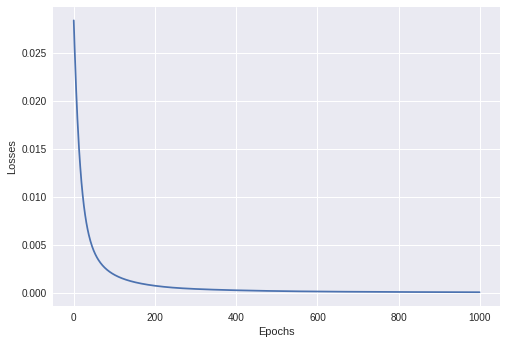

In [51]:
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) , max(X[:, 0]))
  y_span = np.linspace(min(X[:, 1]) , max(X[:, 1]))
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) # .ravel convert the 2D to 1D i.e flatten
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

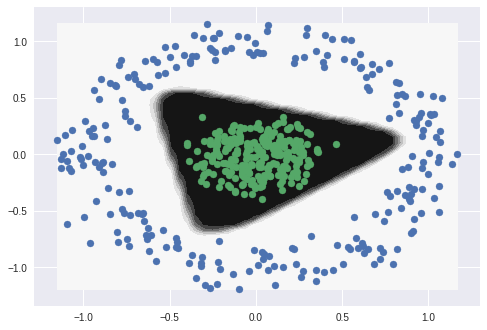

In [66]:
 plot_decision_boundary(X_data,y_data)
 scatter_plot()

Step4: Predict Dataset

Prediction is  1


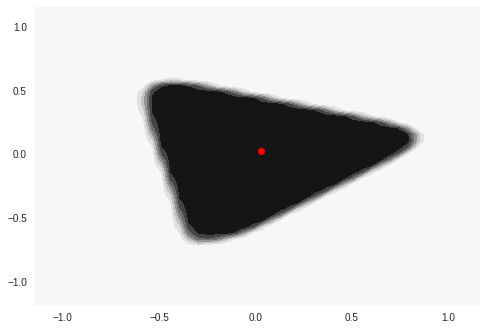

In [69]:
x=0.025
y=0.025
point=torch.tensor([x,y])
pred=model.predict(point)
plt.plot([x],[y],'ro')
plot_decision_boundary(X_data,y_data)
scatter_plot()
print("Prediction is ",pred)